In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'lightgrey'

In [2]:
def get_financials(ticker:str) -> pd.DataFrame:
    bs = yf.Ticker(ticker).balance_sheet.iloc[:, :-1]
    ist = yf.Ticker(ticker).income_stmt.iloc[:, :-1]
    cf = yf.Ticker(ticker).cash_flow.iloc[:, :-1]
    return bs, ist, cf

def volatility(ticker:str) -> float:
    return (yf.download(ticker, start='2021-01-01', progress=False)['Close'].pct_change().dropna().std() * np.sqrt(252)).values[0]

def plot_prices(ticker:str):
    data = yf.download(ticker, start='2021-01-01', progress=False)['Close']
    vol = volatility(ticker)
    plt.figure(figsize=(20, 8))
    plt.plot(data, color = 'navy')
    plt.title(f'{ticker} stock price, volatility: {vol:.2%}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid()
    plt.show()

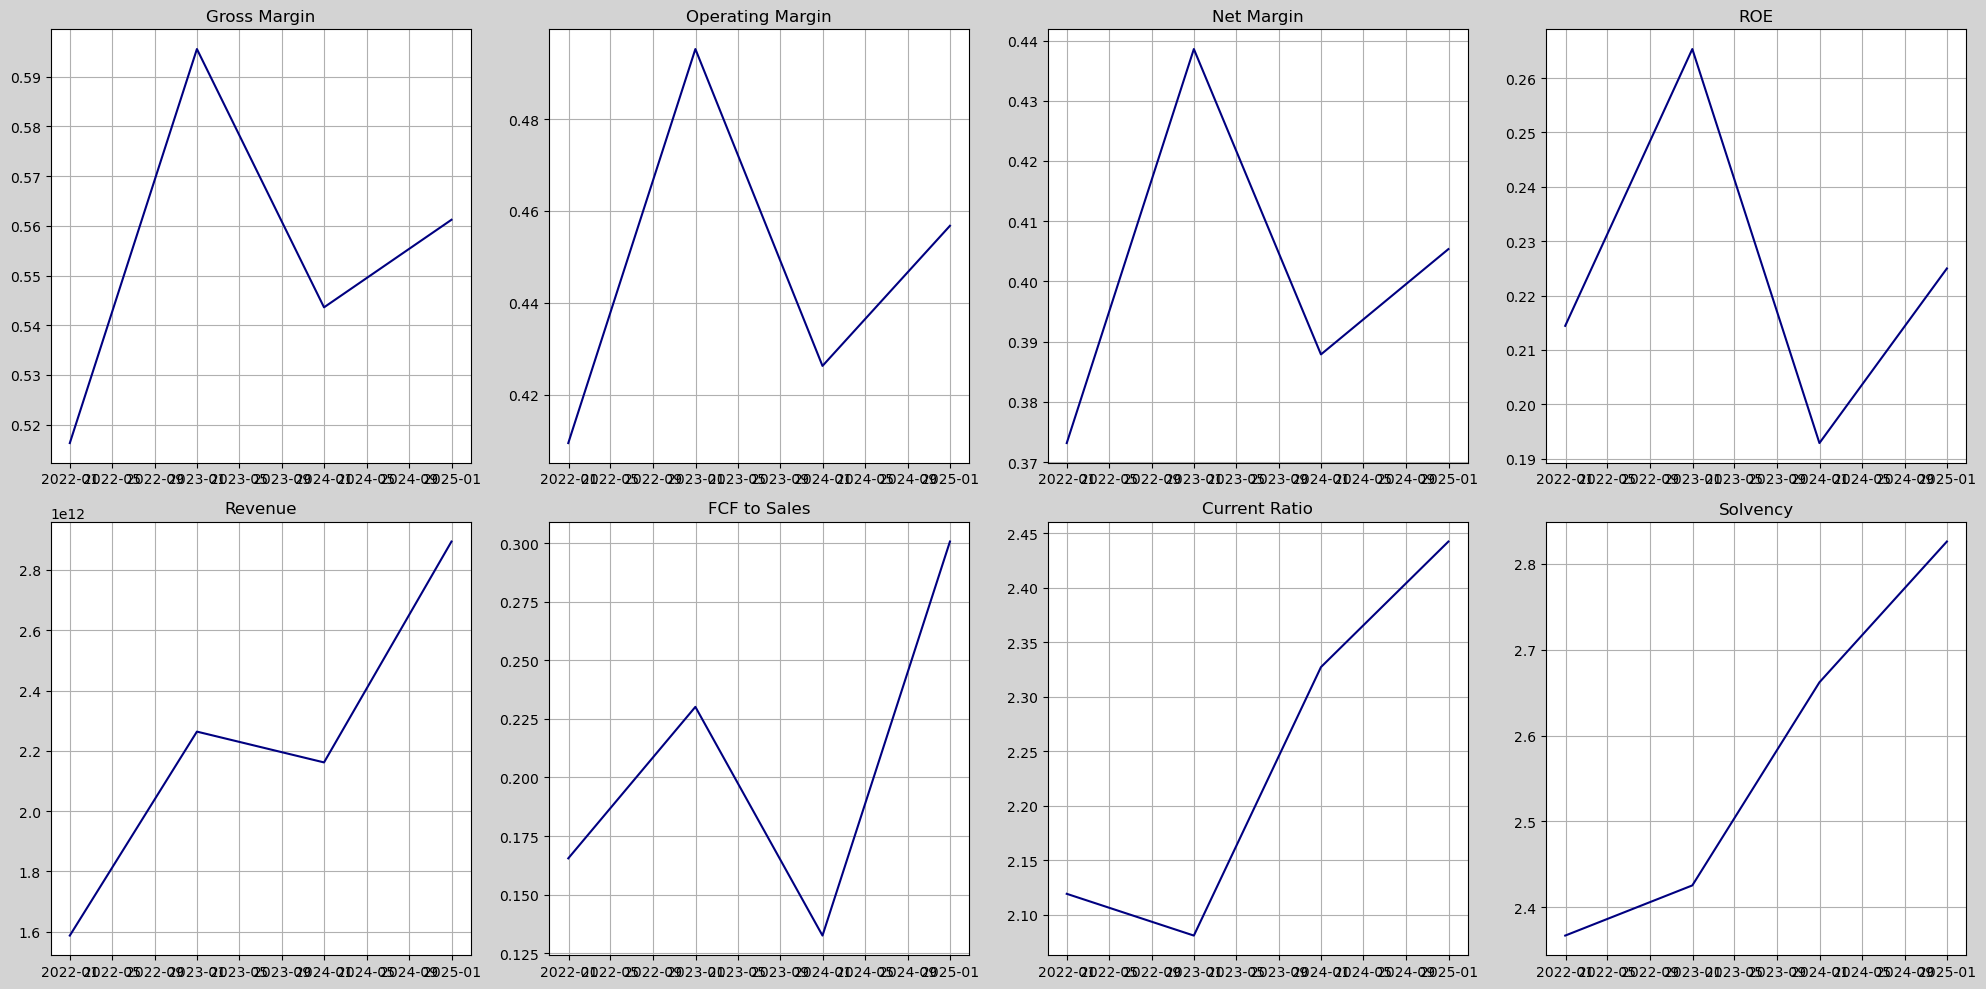

YF.download() has changed argument auto_adjust default to True


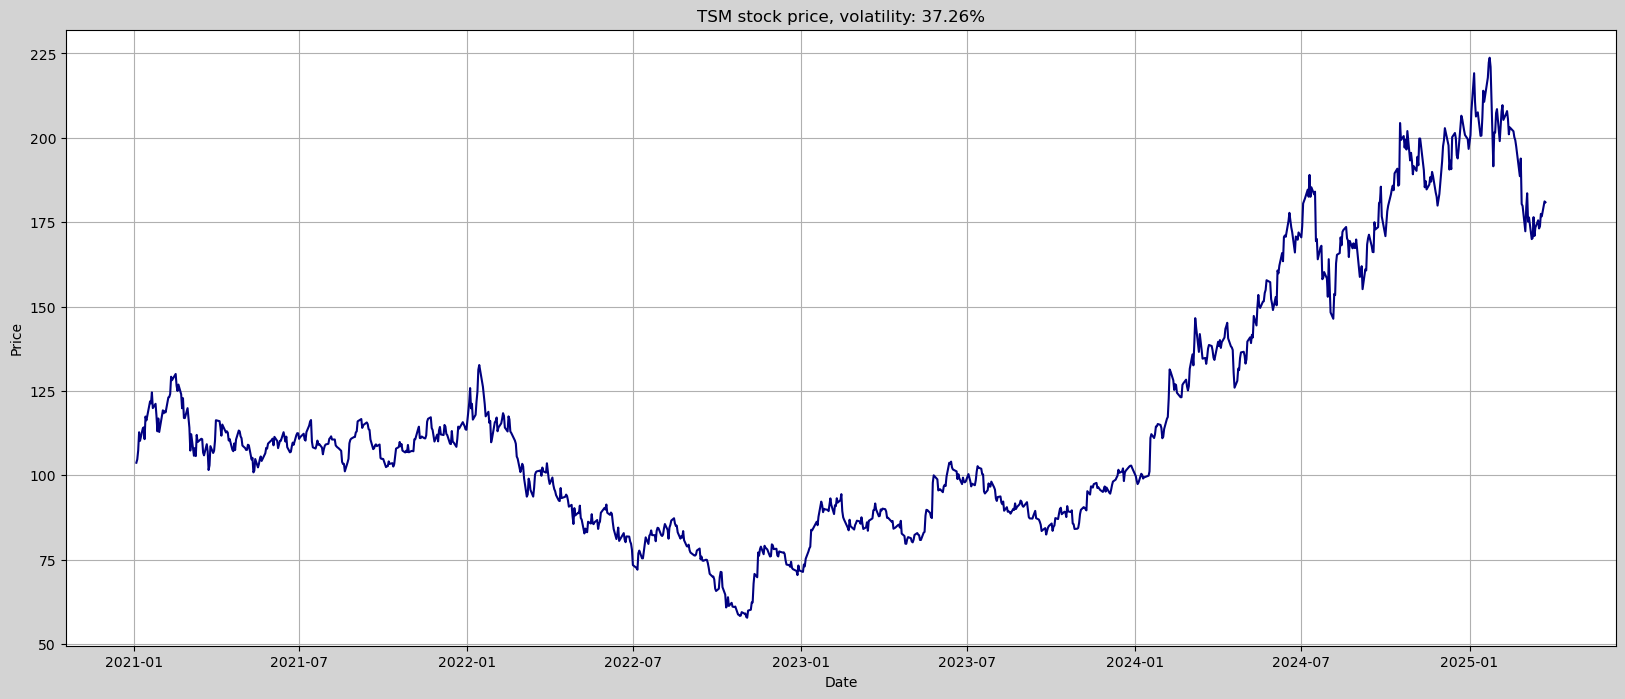

In [3]:
ticker = 'TSM'

bs, ist, cf = get_financials(ticker)

gross_margin = ist.loc['Gross Profit']/ist.loc['Total Revenue']

operating_margin = ist.loc['Operating Income']/ist.loc['Total Revenue']

net_margin = ist.loc['Net Income Common Stockholders']/ist.loc['Total Revenue']

roe = ist.loc['Net Income Common Stockholders'] / bs.loc['Total Capitalization']

revenue = ist.loc['Total Revenue']

fcf_to_sales = cf.loc['Free Cash Flow'] / ist.loc['Total Revenue']

current_ratio = bs.loc['Current Assets']/bs.loc['Current Liabilities']

solvency = bs.loc['Total Assets']/bs.loc['Total Liabilities Net Minority Interest']

df_multiplos = pd.DataFrame({
    'Gross Margin': gross_margin,
    'Operating Margin': operating_margin,
    'Net Margin': net_margin,
    'ROE': roe,
    'Revenue': revenue,
    'FCF to Sales': fcf_to_sales,
    'Current Ratio': current_ratio,
    'Solvency': solvency
})

df_multiplos.sort_index()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.ravel()  # Aplana la matriz de ejes para indexar con un solo número

for i, column in enumerate(df_multiplos.columns):
    axes[i].plot(df_multiplos.index, df_multiplos.iloc[:, i], c = 'navy')
    axes[i].set_title(column)
    axes[i].grid()
plt.tight_layout()
plt.show()

plot_prices(ticker)